In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [46]:
df=pd.read_excel('C:\\Users\\Hp\\Desktop\\decission Tree\\cardio_train_full.xlsx')

In [50]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0


In [10]:
df.shape

(70000, 13)

In [16]:
## Null values check
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [19]:
## Missing data anoth way to check
df.isnull().values.any()

False

In [20]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:ylabel='cardio'>

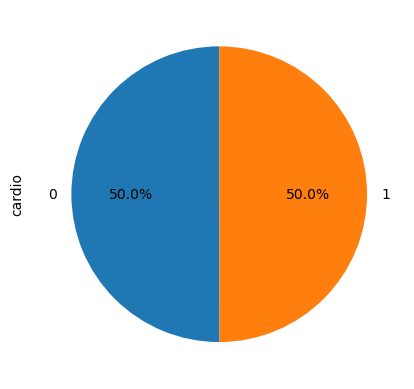

In [22]:
# percentage of people having cardio disease and without disease
df['cardio'].value_counts().plot(kind="pie",autopct='%1.1f%%', startangle=90)


In [48]:
#convert the age into years
df['age']=(df['age']/365).round(0).astype(int)

In [55]:
df['age']=pd.to_numeric(df['age'],downcast='integer')

In [59]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,62,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


<AxesSubplot:xlabel='age', ylabel='count'>

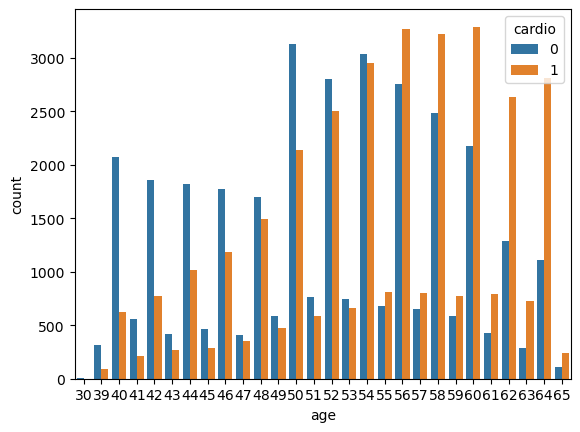

In [68]:
sns.countplot(x ='age', hue='cardio',data = df)

In [69]:
#coreltion of the columns
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003050,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003050,1.000000,-0.023017,-0.081456,0.053661,0.020793,0.017754,0.154386,0.098596,-0.047884,-0.029918,-0.009819,0.237749
gender,0.003502,-0.023017,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081456,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,0.053661,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.003356,0.020793,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017754,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154386,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098596,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047884,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


In [76]:
df=df.drop('id',axis=1)

<AxesSubplot:>

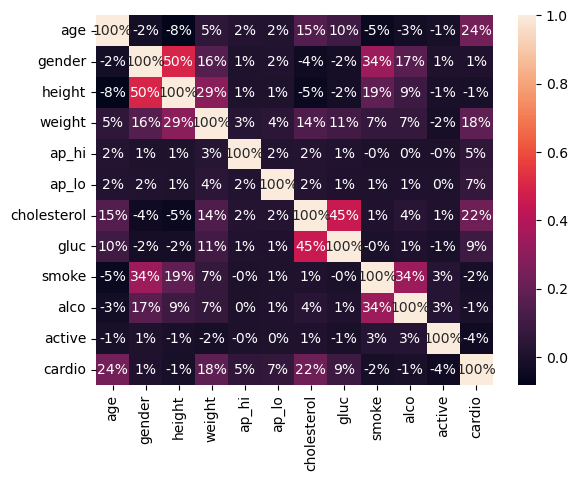

In [77]:
sns.heatmap(df.corr(),annot=True,fmt='.0%')

<AxesSubplot:>

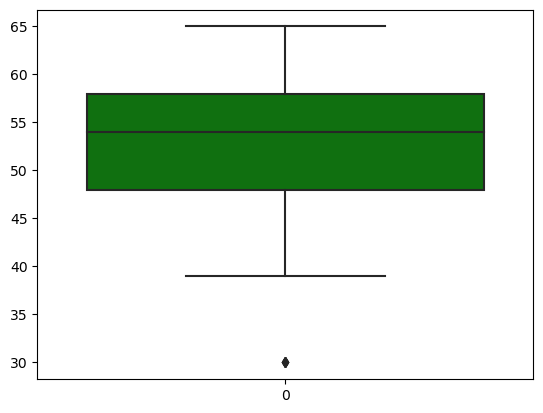

In [78]:
sns.boxplot(data = df['age'],color = 'green')

In [84]:
#split data into feature data and target
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [87]:
#split data into training and testing 80/20
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [88]:
# importing a scaling modeule to bring the data between 0 to 1
from sklearn.preprocessing import StandardScaler

In [89]:
sc = StandardScaler()

In [93]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [110]:
from sklearn.model_selection import GridSearchCV

In [101]:
clf=DecisionTreeClassifier(random_state=0)

In [102]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [103]:
y_pred=clf.predict(X_test)

In [105]:
from sklearn.metrics import accuracy_score

In [106]:
accuracy_score(y_test,y_pred)

0.5910714285714286

In [ ]:
#Hyperparameter tunning

In [107]:
from sklearn.model_selection import GridSearchCV

In [108]:
grid

{'criterion': ['gini', 'entropy'],
 'splitter': ['best', 'random'],
 'max_depth': range(2, 20),
 'min_samples_split': range(2, 10),
 'min_samples_leaf': range(1, 10)}

In [111]:
dtc1=DecisionTreeClassifier(random_state=0)

In [112]:
grid_search = GridSearchCV(estimator = dtc1, param_grid = grid, cv = 5)

In [113]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [114]:
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}


In [116]:
from sklearn.tree import DecisionTreeClassifier
dtc1 = DecisionTreeClassifier(criterion = 'gini', max_depth = 6, min_samples_leaf = 2, min_samples_split = 2, splitter = 'best', random_state = 0)
dtc1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, random_state=0)

In [117]:
y_pred1 = dtc1.predict(X_test)

In [118]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [119]:
confusion_matrix(y_test, y_pred1)

array([[5754, 1234],
       [2877, 4135]], dtype=int64)

In [120]:
accuracy_score(y_test, y_pred1)

0.7063571428571429

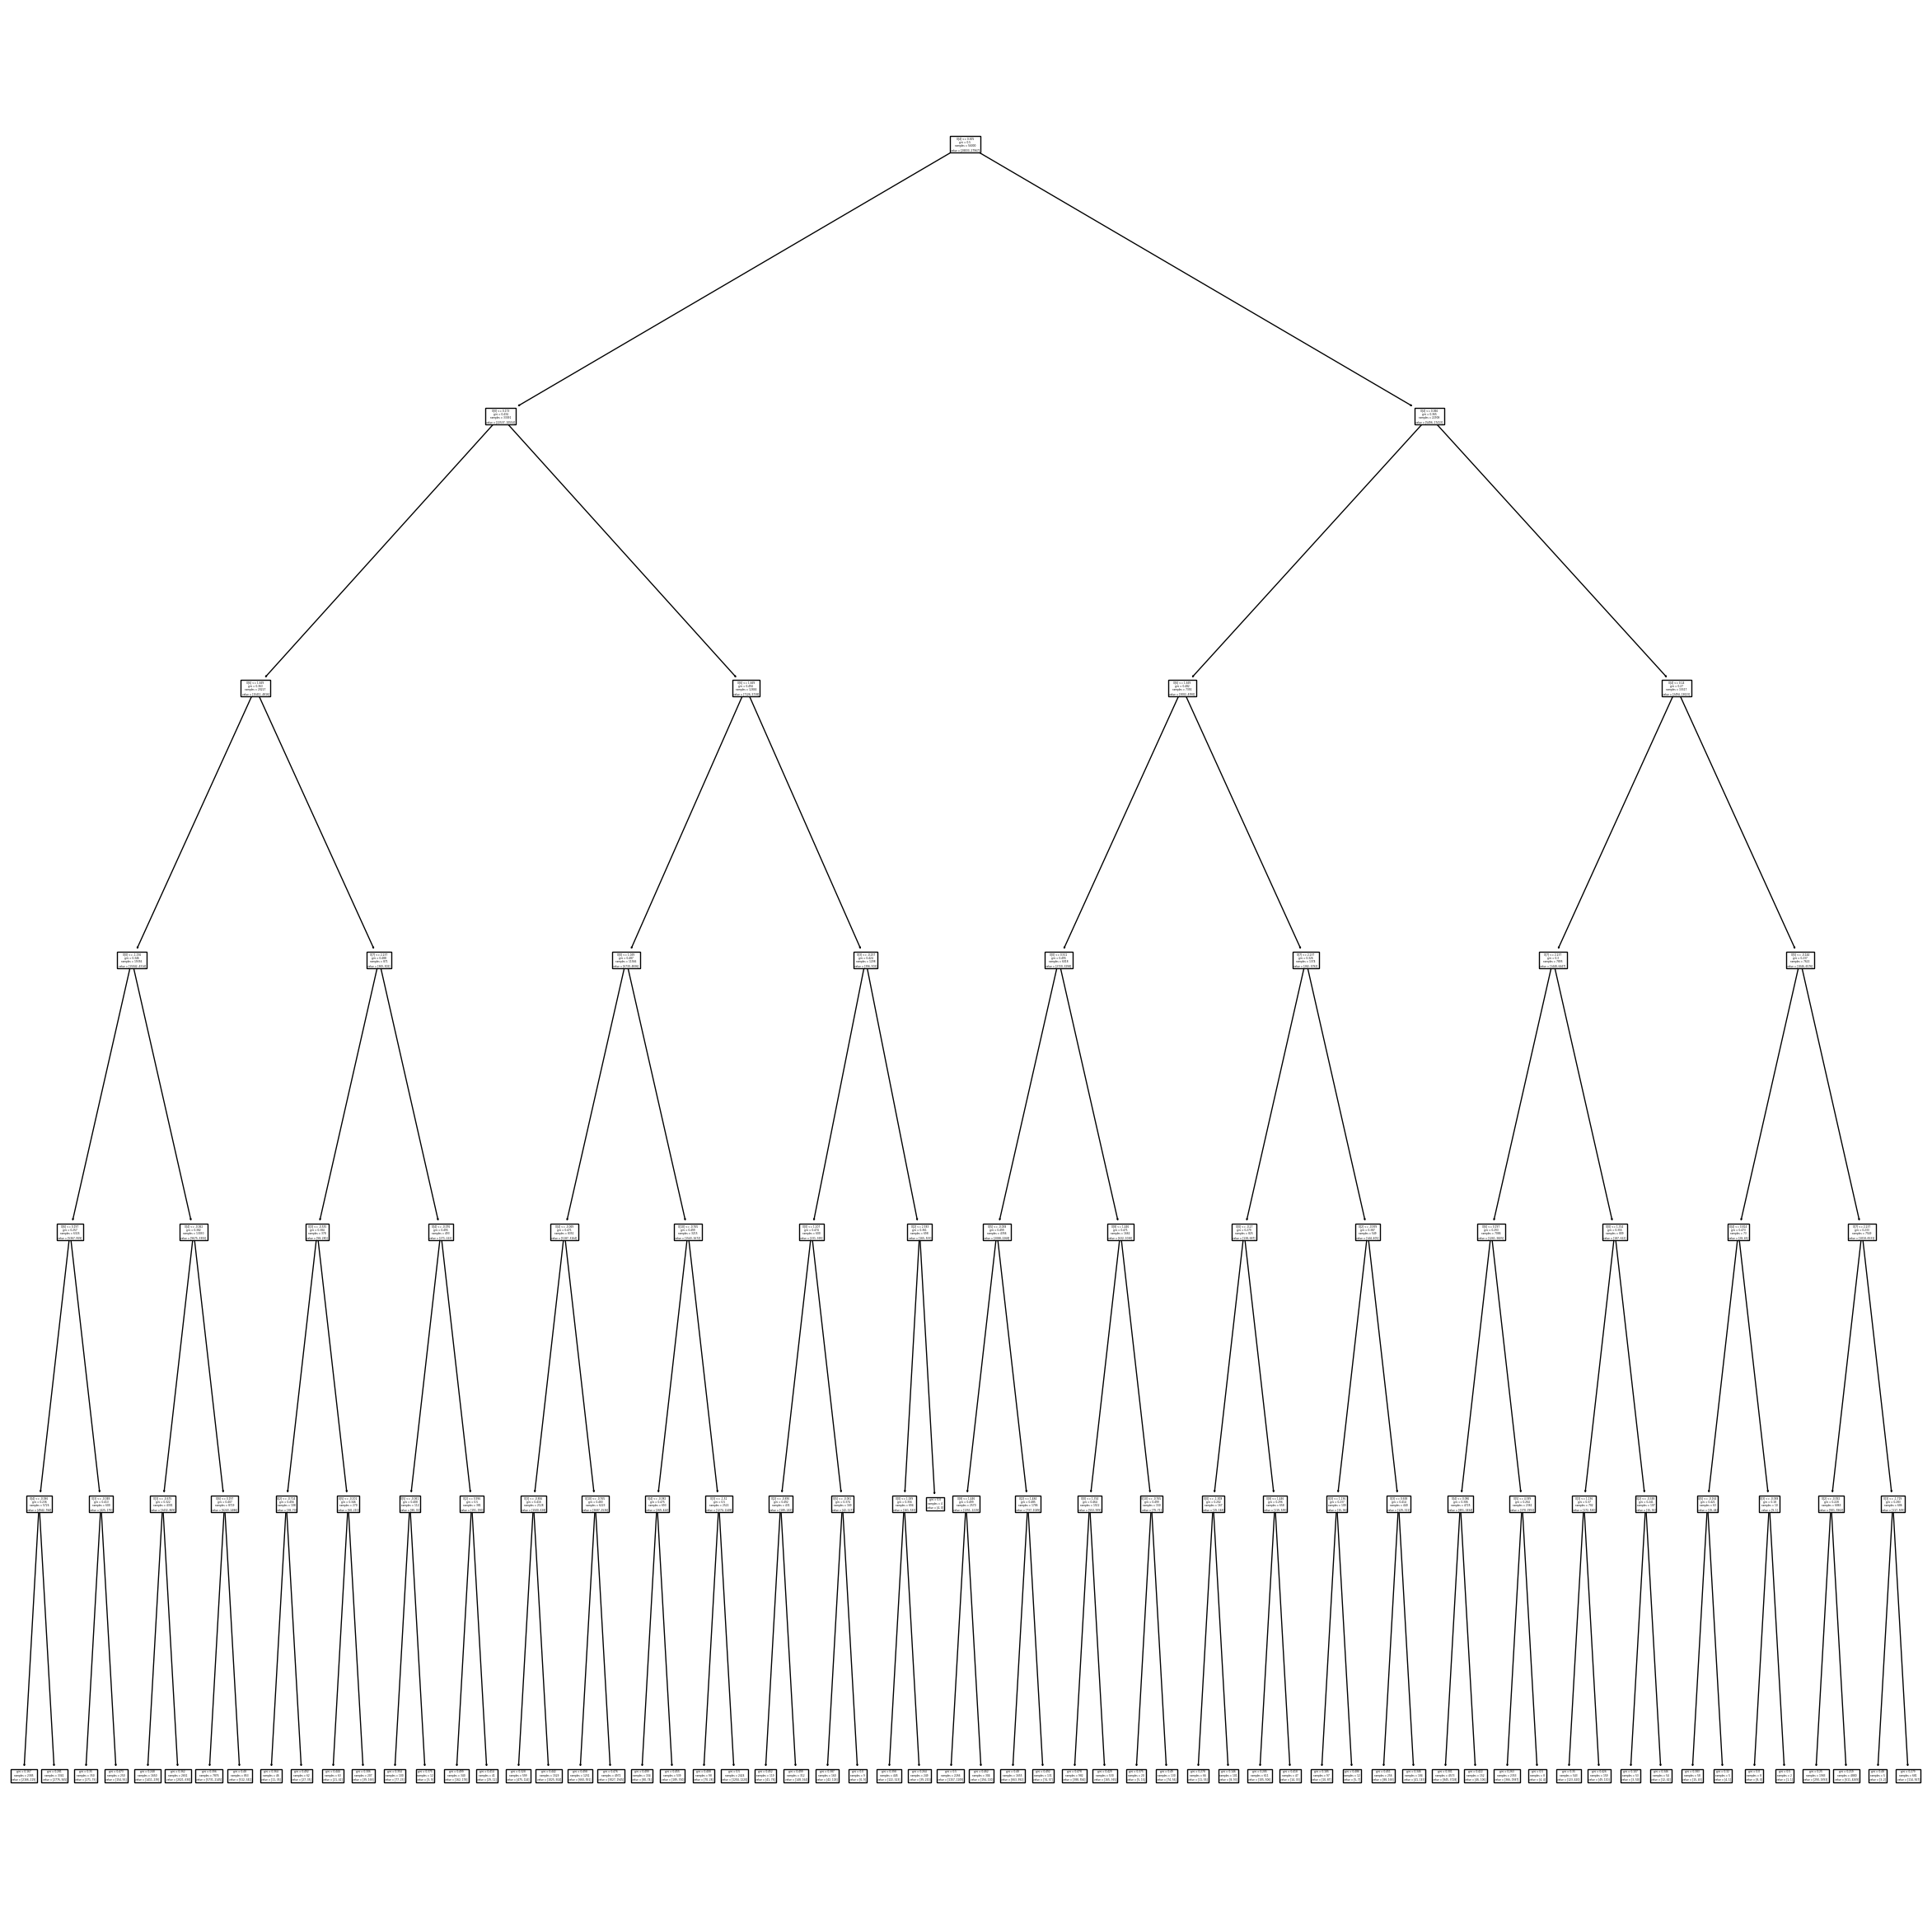

In [121]:
from sklearn import tree
plt.figure(figsize=(30,30))
tree.plot_tree(dtc1)
plt.show()